Chen Kuchiersky - 208081745

Lee Cohen - 209008036

In [241]:
from nltk.tokenize import word_tokenize,WhitespaceTokenizer
import nltk
nltk.download('punkt')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [242]:
#--Q2--
df = pd.read_csv('/content/spam_ham_dataset.csv')
tokenizer_re = r"[^a-zA-Z0-9]"
from sortedcontainers import SortedSet
import re

def tokenize(text: str) -> list():
    return re.sub(tokenizer_re, " ", text.lower()).split()

wordset = SortedSet()

for text in df.text:
    wordset.update(tokenize(text))


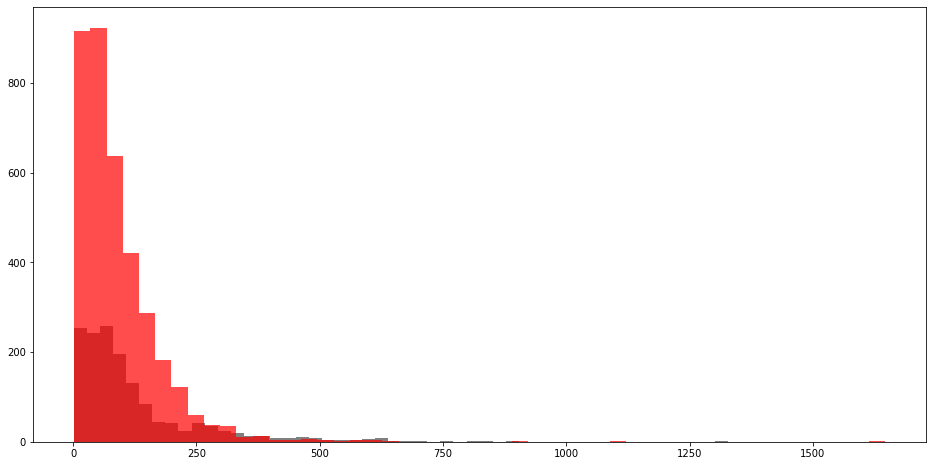

In [243]:
#--Q3--
#function that gets the spam and ham from the label column, and return 2 histogram charts
def plot_target_based_features(feature):
    spam = df[df.label_num == 1][feature]
    ham = df[df.label_num == 0][feature]
    plt.figure(1, figsize=(16,8))
    plt.subplot(1,1,1)
    _ = plt.hist(spam, alpha=0.5, color="black", bins=50)
    _ = plt.hist(ham, alpha=0.7, color="red", bins=50)
    return _

#executing the function with new column- unique word for each ham and sapm
df["unique_word_count"] =df.text.map(lambda x: len(set(str(x).split())))
_ = plot_target_based_features("unique_word_count")

In [244]:
#--Q4--
#vectorizing and getting the features
vectorizer = CountVectorizer(vocabulary=wordset)
X_vector = vectorizer.fit_transform(df['text'].tolist())
df_bow = pd.DataFrame(X_vector.toarray(),columns=vectorizer.get_feature_names())
# df_bow.head(100)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [245]:
#--Q5--
#spliting the data to train and test( 0.8% traing , 0.2% test)
train,test = train_test_split(df, test_size=0.2, random_state=123)

In [246]:
#deleting nulls
train_text=train[~pd.isnull(train['text'])]['text']
print(train_text.shape)
test_text=test[~pd.isnull(test['text'])]['text']
print(test_text.shape)


(4136,)
(1035,)


In [247]:
#transforming text to featuers
vectorizer = TfidfVectorizer(stop_words='english')
train_input = vectorizer.fit_transform(train_text)
print(train_input.shape[0],train_input.shape[1])
test_input = vectorizer.transform(test_text)
print(test_input.shape[0],test_input.shape[1])



4136 44813
1035 44813


In [248]:
#deleting nulls
expected_train=train[~pd.isnull(train['text'])]['label_num']
print(expected_train.shape)
expected_test=test[~pd.isnull(test['text'])]['label_num']
print(expected_test.shape)



(4136,)
(1035,)


In [249]:
classifier = LogisticRegression(C=5, max_iter=1000)
classifier.fit(train_input, expected_train)

LogisticRegression(C=5, max_iter=1000)

In [250]:
#--Q6--
#calculating scores and printing them
pred = classifier.predict(test_input)
recall=metrics.recall_score(expected_test,pred)
print(f"recall score- {recall}")
precision=metrics.precision_score(expected_test,pred)
print(f"precision score- {precision}")
accuracy=metrics.accuracy_score(expected_test,pred)
print(f"accuracy score- {accuracy}")
f1_score=metrics.f1_score(expected_test,pred)
print(f"f1_score score- {f1_score}")


recall score- 0.9756944444444444
precision score- 0.9756944444444444
accuracy score- 0.9864734299516909
f1_score score- 0.9756944444444444


In [251]:
#--Q7--
#list of three vecotirzes to run over
vectorizers=[TfidfVectorizer(stop_words='english',ngram_range=(2,3)),TfidfVectorizer(),CountVectorizer()]
df_scores=pd.DataFrame()

for vectorizer in vectorizers:

  train_input = vectorizer.fit_transform(train_text)
  test_input = vectorizer.transform(test_text)
  expected_train=train[~pd.isnull(train['text'])]['label_num']
  expected_test=test[~pd.isnull(test['text'])]['label_num']

  #building model for each vectorizer
  classifier = LogisticRegression(C=5, max_iter=1000)
  classifier.fit(train_input, expected_train)
  pred = classifier.predict(test_input)

  #calculate scores for each model
  recall=metrics.recall_score(expected_test,pred)
  precision=metrics.precision_score(expected_test,pred)
  accuracy=metrics.accuracy_score(expected_test,pred)
  f1_score=metrics.f1_score(expected_test,pred)


  #--Q8--
  #creating scores df to each vectorizer and appending to total dataframe of vectorizers  
  scores=[[vectorizer,recall,precision,accuracy,f1_score]]
  df= pd.DataFrame(scores, columns=['vectorizer', 'recall','precision','accuracy','f1_score'])
  df_scores=df_scores.append(df,ignore_index=True)

print(df_scores)




                                          vectorizer    recall  precision  \
0  TfidfVectorizer(ngram_range=(2, 3), stop_words...  0.746528   0.990783   
1                                  TfidfVectorizer()  0.979167   0.972414   
2                                  CountVectorizer()  0.961806   0.961806   

   accuracy  f1_score  
0  0.927536  0.851485  
1  0.986473  0.975779  
2  0.978744  0.961806  


--Q9--

The most accurate result was the score of - TfidfVectorizer() vectorizer (98.6%), without using ngrams and stop_words parameters.
It means that in the text column in the dataframe, there is no significate use of pharses and stopwords in the text.




